# Text summarizer in Python, A Tale of Two Cities

## Credit: code from https://github.com/louisteo9/personal-text-summarizer

In [1]:
# Natural Language Tool Kit (NLTK)
import nltk
nltk.download('stopwords')

# Regular Expression for text preprocessing
import re

# Heap (priority) queue algorithm to get the top sentences
import heapq

# NumPy for numerical computing
import numpy as np

# pandas for creating DataFrames
import pandas as pd

# matplotlib for plot
from matplotlib import pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /home/david/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Load text data

In [2]:
import requests
import re

r = requests.get("https://www.gutenberg.org/files/98/98-0.txt")
raw_text = r.text

In [3]:
print(raw_text[0:1000])

ï»¿The Project Gutenberg EBook of A Tale of Two Cities, by Charles Dickens

This eBook is for the use of anyone anywhere in the United States and most
other parts of the world at no cost and with almost no restrictions
whatsoever.  You may copy it, give it away or re-use it under the terms of
the Project Gutenberg License included with this eBook or online at
www.gutenberg.org.  If you are not located in the United States, you'll have
to check the laws of the country where you are located before using this ebook.

Title: A Tale of Two Cities
       A Story of the French Revolution
       
Author: Charles Dickens

Release Date: January, 1994 [EBook #98]
[Most recently updated: December 20, 2020]

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK A TALE OF TWO CITIES ***




Produced by Judith Boss, and David Widger




A TALE OF TWO CITIES

A STORY OF THE FRENCH REVOLUTION

By Charles Dickens


CONTENTS




In [66]:
# # load text file
# with open('https://raw.githubusercontent.com/davidrkearney/colab-notebooks/main/datasets/NotesfromtheUnderground_Dostoevsky.txt', 'r') as f:
#     file_data = f.read()

In [67]:
# text_file = open("https://raw.githubusercontent.com/davidrkearney/colab-notebooks/main/datasets/NotesfromtheUnderground_Dostoevsky.txt", "r")
# lines = raw_text.readlines()

In [68]:
# lines = raw_text.readlines()

In [69]:
# text_file.close()

In [70]:
# df = pd.read_txt('https://raw.githubusercontent.com/davidrkearney/colab-notebooks/main/datasets/NotesfromtheUnderground_Dostoevsky.txt')

In [5]:
# # view text data
# print(lines)

## Preprocess text

In [13]:
text = raw_text
text = re.sub(r'\[[0-9]*\]',' ',text) # replace reference number i.e. [1], [10], [20] with empty space, if any..
text = re.sub(r'\s+',' ',text) # replace one or more spaces with single space
#print(text)

Next, we form a **clean text** with lower case (without special characters, digits and extra spaces) and split it into individual word, for word score computation and formation of the word histogram. 

The reason to form a clean text is so that the algorithm won't treat, i.e. **"understanding"** and **understanding**, as two different words.

In [17]:
# generate clean text
clean_text = text.lower() # convert all uppercase characters into lowercase characters
clean_text = re.sub(r'\W',' ',clean_text) # replace character other than [a-zA-Z0-9] with empty space
clean_text = re.sub(r'\d',' ',clean_text) # replace digit with empty space
clean_text = re.sub(r'\s+',' ',clean_text) # replace one or more spaces with a single space

#print(clean_text)

## Split text into sentences

We split (tokenize) the text into sentences using NLTK **sent_tokenize()** method. We will evaluate the importance of each of sentences, then decide if we should each include in our summary. 

In [24]:
# split (tokenize) the sentences
sentences = nltk.sent_tokenize(text)
#print(sentences)

In [22]:
import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to /home/david/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Remove stop words

Stop words are English words which do not add much meaning to a sentence. They can be safely ignored without sacrificing the meaning of the sentence. We already downloaded a file with English stop words in the first section of the notebook. 

Here, we will get the list of stop words and store them in **stop_word** variable.

In [25]:
# get stop words list
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Build word histogram

In [26]:
# create an empty dictionary to house the word count
word_count = {}

# loop through tokenized words, remove stop words and save word count to dictionary
for word in nltk.word_tokenize(clean_text):
    # remove stop words
    if word not in stop_words:
        # save word count to dictionary
        if word not in word_count.keys():
            word_count[word] = 1
        else:
            word_count[word] += 1

Let's plot the word histogram and see the results.

In [27]:
# plt.figure(figsize=(16,10))
# plt.xticks(rotation = 90)
# plt.bar(word_count.keys(), word_count.values())
# plt.show()

In [28]:
def plot_top_words(word_count_dict, show_top_n=20):
    word_count_table = pd.DataFrame.from_dict(word_count_dict, orient = 'index').rename(columns={0: 'score'})
    word_count_table.sort_values(by='score').tail(show_top_n).plot(kind='barh', figsize=(10,10))
    plt.show()

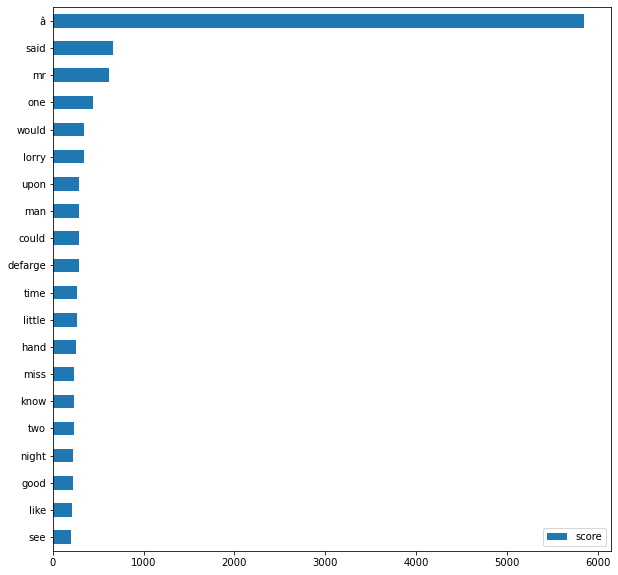

In [29]:
plot_top_words(word_count, 20)

In [30]:
sentence_score = {}

# loop through tokenized sentence, only take sentences that have less than 30 words, then add word score to form sentence score
for sentence in sentences:
    # check if word in sentence is in word_count dictionary
    for word in nltk.word_tokenize(sentence.lower()):
        if word in word_count.keys():
            # only take sentence that has less than 30 words
            if len(sentence.split(' ')) < 30:
                # add word score to sentence score
                if sentence not in sentence_score.keys():
                    sentence_score[sentence] = word_count[word]
                else:
                    sentence_score[sentence] += word_count[word]

In [31]:
df_sentence_score = pd.DataFrame.from_dict(sentence_score, orient = 'index').rename(columns={0: 'score'})
df_sentence_score.sort_values(by='score', ascending = False)

,score
"I know this is a confidence,â she modestly said, after a little hesitation, and in earnest tears, âI know you would say this to no one else.",2445
"Thus engaged, with her right elbow supported by her left hand, Madame Defarge said nothing when her lord came in, but coughed just one grain of cough.",2373
"Vengeance and retribution require a long time; it is the rule.â âIt does not take a long time to strike a man with Lightning,â said Defarge.",2312
"âWe have borne this a long time,â said Madame Defarge, turning her eyes again upon Lucie.",2208
"âYou had better, Lucie,â said Mr. Lorry, doing all he could to propitiate, by tone and manner, âhave the dear child here, and our good Pross.",2197
...,...
What are you hooroaring at?,1
âHim and his hooroars!,1
âCome on at a footpace!,1
But he was not persuaded.,1


In [32]:
best_sentences = heapq.nlargest(3, sentence_score, key=sentence_score.get)

In [33]:
print('SUMMARY')
print('------------------------')

for sentence in sentences:
    if sentence in best_sentences:
        print (sentence)

SUMMARY
------------------------
Thus engaged, with her right elbow supported by her left hand, Madame Defarge said nothing when her lord came in, but coughed just one grain of cough.
I know this is a confidence,â she modestly said, after a little hesitation, and in earnest tears, âI know you would say this to no one else.
Vengeance and retribution require a long time; it is the rule.â âIt does not take a long time to strike a man with Lightning,â said Defarge.
